In [29]:
import pandas as pd
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# from category_encoders import *
import numpy as np
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import average_precision_score,recall_score,roc_auc_score
import time
import matplotlib.pyplot as plt
#extract the reduced data without label
bitcoin_train_df = pd.read_csv("bitcoin_train.txt",delimiter='\t')
bitcoin_test_df = pd.read_csv("bitcoin_test.txt",delimiter='\t')
bitcoin_train_pca_reduced_df = pd.read_csv("bitcoin_train_pca_reduced.txt",delimiter='\t')
bitcoin_test_pca_reduced_df = pd.read_csv("bitcoin_test_pca_reduced.txt",delimiter='\t')
bitcoin_train_ica_reduced_df = pd.read_csv("bitcoin_train_ica_reduced.txt",delimiter='\t')
bitcoin_test_ica_reduced_df = pd.read_csv("bitcoin_test_ica_reduced.txt",delimiter='\t')
bitcoin_train_grp_reduced_df = pd.read_csv("bitcoin_train_grp_reduced.txt",delimiter='\t')
bitcoin_test_grp_reduced_df = pd.read_csv("bitcoin_test_grp_reduced.txt",delimiter='\t')
bitcoin_train_fa_reduced_df = pd.read_csv("bitcoin_train_fa_reduced.txt",delimiter='\t')
bitcoin_test_fa_reduced_df = pd.read_csv("bitcoin_test_fa_reduced.txt",delimiter='\t')

skin_train_df = pd.read_csv("skin_train.txt",delimiter='\t')
skin_test_df = pd.read_csv("skin_test.txt",delimiter='\t')
skin_train_pca_reduced_df = pd.read_csv("skin_train_pca_reduced.txt",delimiter='\t')
skin_test_pca_reduced_df = pd.read_csv("skin_test_pca_reduced.txt",delimiter='\t')
skin_train_ica_reduced_df = pd.read_csv("skin_train_ica_reduced.txt",delimiter='\t')
skin_test_ica_reduced_df = pd.read_csv("skin_test_ica_reduced.txt",delimiter='\t')
skin_train_grp_reduced_df = pd.read_csv("skin_train_grp_reduced.txt",delimiter='\t')
skin_test_grp_reduced_df = pd.read_csv("skin_test_grp_reduced.txt",delimiter='\t')
skin_train_fa_reduced_df = pd.read_csv("skin_train_fa_reduced.txt",delimiter='\t')
skin_test_fa_reduced_df = pd.read_csv("skin_test_fa_reduced.txt",delimiter='\t')

X_bitcoin_train = np.array(bitcoin_train_df.iloc[:,:-1])
y_bitcoin_train = np.array(bitcoin_train_df.iloc[:,-1])
X_bitcoin_test = np.array(bitcoin_test_df.iloc[:,:-1])
y_bitcoin_test = np.array(bitcoin_test_df.iloc[:,-1])

X_skin_train = np.array(skin_train_df.iloc[:,:-1])
y_skin_train = np.array(skin_train_df.iloc[:,-1])
X_skin_test = np.array(skin_test_df.iloc[:,:-1])
y_skin_test = np.array(skin_test_df.iloc[:,-1])

X_bitcoin_train_pca_reduced=np.array(bitcoin_train_pca_reduced_df.iloc[:,1:-1])
X_bitcoin_train_ica_reduced=np.array(bitcoin_train_ica_reduced_df.iloc[:,1:-1])
X_bitcoin_train_grp_reduced=np.array(bitcoin_train_grp_reduced_df.iloc[:,1:-1])
X_bitcoin_train_fa_reduced=np.array(bitcoin_train_fa_reduced_df.iloc[:,1:-1])
# y_bitcoin_train_fa_reduced = np.array(bitcoin_train_fa_reduced_df.iloc[:,-1])

X_bitcoin_test_pca_reduced=np.array(bitcoin_test_pca_reduced_df.iloc[:,1:-1])

X_bitcoin_test_ica_reduced=np.array(bitcoin_test_ica_reduced_df.iloc[:,1:-1])

X_bitcoin_test_grp_reduced=np.array(bitcoin_test_grp_reduced_df.iloc[:,1:-1])

X_bitcoin_test_fa_reduced=np.array(bitcoin_test_fa_reduced_df.iloc[:,1:-1])

scaler = StandardScaler()
X_bitcoin_train=scaler.fit_transform(X_bitcoin_train)
X_bitcoin_test = scaler.transform(X_bitcoin_test)
scaler = StandardScaler()
X_bitcoin_train_pca_reduced=scaler.fit_transform(X_bitcoin_train_pca_reduced)
X_bitcoin_test_pca_reduced = scaler.transform(X_bitcoin_test_pca_reduced)
scaler = StandardScaler()
X_bitcoin_train_ica_reduced=scaler.fit_transform(X_bitcoin_train_ica_reduced)
X_bitcoin_test_ica_reduced = scaler.transform(X_bitcoin_test_ica_reduced)
scaler = StandardScaler()
X_bitcoin_train_grp_reduced=scaler.fit_transform(X_bitcoin_train_grp_reduced)
X_bitcoin_test_grp_reduced = scaler.transform(X_bitcoin_test_grp_reduced)
scaler = StandardScaler()
X_bitcoin_train_fa_reduced=scaler.fit_transform(X_bitcoin_train_fa_reduced)
X_bitcoin_test_fa_reduced=scaler.transform(X_bitcoin_test_fa_reduced)



X_skin_train_pca_reduced=np.array(skin_train_pca_reduced_df.iloc[:,1:-1])
X_skin_train_ica_reduced=np.array(skin_train_ica_reduced_df.iloc[:,1:-1])
X_skin_train_grp_reduced=np.array(skin_train_grp_reduced_df.iloc[:,1:-1])
X_skin_train_fa_reduced=np.array(skin_train_fa_reduced_df.iloc[:,1:-1])
y_skin_train_fa_reduced = np.array(skin_train_fa_reduced_df.iloc[:,-1])

X_skin_test_pca_reduced=np.array(skin_test_pca_reduced_df.iloc[:,1:-1])
X_skin_test_ica_reduced=np.array(skin_test_ica_reduced_df.iloc[:,1:-1])
X_skin_test_grp_reduced=np.array(skin_test_grp_reduced_df.iloc[:,1:-1])
X_skin_test_fa_reduced=np.array(skin_test_fa_reduced_df.iloc[:,1:-1])

scaler = StandardScaler()
X_skin_train=scaler.fit_transform(X_skin_train)
X_skin_test = scaler.transform(X_skin_test)
scaler = StandardScaler()
X_skin_train_pca_reduced=scaler.fit_transform(X_skin_train_pca_reduced)
X_skin_test_pca_reduced = scaler.transform(X_skin_test_pca_reduced)
scaler = StandardScaler()
X_skin_train_ica_reduced=scaler.fit_transform(X_skin_train_ica_reduced)
X_skin_test_ica_reduced = scaler.transform(X_skin_test_ica_reduced)
scaler = StandardScaler()
X_skin_train_grp_reduced=scaler.fit_transform(X_skin_train_grp_reduced)
X_skin_test_grp_reduced = scaler.transform(X_skin_test_grp_reduced)
scaler = StandardScaler()
X_skin_train_fa_reduced=scaler.fit_transform(X_skin_train_fa_reduced)
X_skin_test_fa_reduced=scaler.transform(X_skin_test_fa_reduced)

In [81]:
#extract the reduced skin data with Kmeans and GMM label
X_skin_train_kmeans_clustered_reduced_pca_df = pd.read_csv("skin_train_kmeans_clustered_reduced_pca.txt",delimiter='\t')
X_skin_train_kmeans_clustered_reduced_ica_df = pd.read_csv("skin_train_kmeans_clustered_reduced_ica.txt",delimiter='\t')
X_skin_train_kmeans_clustered_reduced_fa_df = pd.read_csv("skin_train_kmeans_clustered_reduced_fa.txt",delimiter='\t')
X_skin_train_kmeans_clustered_reduced_grp_df = pd.read_csv("skin_train_kmeans_clustered_reduced_grp.txt",delimiter='\t')

X_skin_test_kmeans_clustered_reduced_fa_df = pd.read_csv("skin_test_kmeans_clustered_reduced_fa.txt",delimiter='\t')
X_skin_test_kmeans_clustered_reduced_ica_df = pd.read_csv("skin_test_kmeans_clustered_reduced_ica.txt",delimiter='\t')
X_skin_test_kmeans_clustered_reduced_pca_df = pd.read_csv("skin_test_kmeans_clustered_reduced_pca.txt",delimiter='\t')
X_skin_test_kmeans_clustered_reduced_grp_df = pd.read_csv("skin_test_kmeans_clustered_reduced_grp.txt",delimiter='\t')

X_skin_train_gmm_clustered_reduced_fa_df = pd.read_csv("skin_train_gmm_clustered_reduced_fa.txt",delimiter='\t')
X_skin_train_gmm_clustered_reduced_ica_df = pd.read_csv("skin_train_gmm_clustered_reduced_ica.txt",delimiter='\t')
X_skin_train_gmm_clustered_reduced_pca_df = pd.read_csv("skin_train_gmm_clustered_reduced_pca.txt",delimiter='\t')
X_skin_train_gmm_clustered_reduced_grp_df = pd.read_csv("skin_train_gmm_clustered_reduced_grp.txt",delimiter='\t')

X_skin_test_gmm_clustered_reduced_fa_df = pd.read_csv("skin_test_gmm_clustered_reduced_fa.txt",delimiter='\t')
X_skin_test_gmm_clustered_reduced_ica_df = pd.read_csv("skin_test_gmm_clustered_reduced_ica.txt",delimiter='\t')
X_skin_test_gmm_clustered_reduced_pca_df = pd.read_csv("skin_test_gmm_clustered_reduced_pca.txt",delimiter='\t')
X_skin_test_gmm_clustered_reduced_grp_df = pd.read_csv("skin_test_gmm_clustered_reduced_grp.txt",delimiter='\t')



X_skin_train_kmeans_clustered_reduced_pca=np.concatenate((X_skin_train_pca_reduced,np.array(X_skin_train_kmeans_clustered_reduced_pca_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_train_kmeans_clustered_reduced_ica=np.concatenate((X_skin_train_ica_reduced,np.array(X_skin_train_kmeans_clustered_reduced_ica_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_train_kmeans_clustered_reduced_grp=np.concatenate((X_skin_train_grp_reduced,np.array(X_skin_train_kmeans_clustered_reduced_grp_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_train_kmeans_clustered_reduced_fa=np.concatenate((X_skin_train_fa_reduced,np.array(X_skin_train_kmeans_clustered_reduced_fa_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_test_kmeans_clustered_reduced_pca=np.concatenate((X_skin_test_pca_reduced,np.array(X_skin_test_kmeans_clustered_reduced_pca_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_test_kmeans_clustered_reduced_ica=np.concatenate((X_skin_test_ica_reduced,np.array(X_skin_test_kmeans_clustered_reduced_ica_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_test_kmeans_clustered_reduced_grp=np.concatenate((X_skin_test_grp_reduced,np.array(X_skin_test_kmeans_clustered_reduced_grp_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_test_kmeans_clustered_reduced_fa=np.concatenate((X_skin_test_fa_reduced,np.array(X_skin_test_kmeans_clustered_reduced_fa_df.iloc[:,-1]).reshape(-1,1)),axis=1)

X_skin_train_gmm_clustered_reduced_pca=np.concatenate((X_skin_train_pca_reduced,np.array(X_skin_train_gmm_clustered_reduced_pca_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_train_gmm_clustered_reduced_ica=np.concatenate((X_skin_train_ica_reduced,np.array(X_skin_train_gmm_clustered_reduced_ica_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_train_gmm_clustered_reduced_grp=np.concatenate((X_skin_train_grp_reduced,np.array(X_skin_train_gmm_clustered_reduced_grp_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_train_gmm_clustered_reduced_fa=np.concatenate((X_skin_train_fa_reduced,np.array(X_skin_train_gmm_clustered_reduced_fa_df.iloc[:,-1]).reshape(-1,1)),axis=1)

X_skin_test_gmm_clustered_reduced_pca=np.concatenate((X_skin_test_pca_reduced,np.array(X_skin_test_gmm_clustered_reduced_pca_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_test_gmm_clustered_reduced_ica=np.concatenate((X_skin_test_ica_reduced,np.array(X_skin_test_gmm_clustered_reduced_ica_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_test_gmm_clustered_reduced_grp=np.concatenate((X_skin_test_grp_reduced,np.array(X_skin_test_gmm_clustered_reduced_grp_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_skin_test_gmm_clustered_reduced_fa=np.concatenate((X_skin_test_fa_reduced,np.array(X_skin_test_gmm_clustered_reduced_fa_df.iloc[:,-1]).reshape(-1,1)),axis=1)

# scaler = StandardScaler()
# X_skin_train_kmeans_clustered_reduced_pca=scaler.fit_transform(X_skin_train_kmeans_clustered_reduced_pca)
# X_skin_test_kmeans_clustered_reduced_pca = scaler.transform(X_skin_test_kmeans_clustered_reduced_pca)
# scaler = StandardScaler()
# X_skin_train_kmeans_clustered_reduced_ica=scaler.fit_transform(X_skin_train_kmeans_clustered_reduced_ica)
# X_skin_test_kmeans_clustered_reduced_ica = scaler.transform(X_skin_test_kmeans_clustered_reduced_ica)
# scaler = StandardScaler()
# X_skin_train_kmeans_clustered_reduced_grp=scaler.fit_transform(X_skin_train_kmeans_clustered_reduced_grp)
# X_skin_test_kmeans_clustered_reduced_grp = scaler.transform(X_skin_test_kmeans_clustered_reduced_grp)
# scaler = StandardScaler()
# X_skin_train_kmeans_clustered_reduced_fa=scaler.fit_transform(X_skin_train_kmeans_clustered_reduced_fa)
# X_skin_test_kmeans_clustered_reduced_fa = scaler.transform(X_skin_test_kmeans_clustered_reduced_fa)



# scaler = StandardScaler()
# X_skin_train_gmm_clustered_reduced_pca=scaler.fit_transform(X_skin_train_gmm_clustered_reduced_pca)
# X_skin_test_gmm_clustered_reduced_pca = scaler.transform(X_skin_test_gmm_clustered_reduced_pca)
# scaler = StandardScaler()
# X_skin_train_gmm_clustered_reduced_ica=scaler.fit_transform(X_skin_train_gmm_clustered_reduced_ica)
# X_skin_test_gmm_clustered_reduced_ica = scaler.transform(X_skin_test_gmm_clustered_reduced_ica)
# scaler = StandardScaler()
# X_skin_train_gmm_clustered_reduced_grp=scaler.fit_transform(X_skin_train_gmm_clustered_reduced_grp)
# X_skin_test_gmm_clustered_reduced_grp = scaler.transform(X_skin_test_gmm_clustered_reduced_grp)
# scaler = StandardScaler()
# X_skin_train_gmm_clustered_reduced_fa=scaler.fit_transform(X_skin_train_gmm_clustered_reduced_fa)
# X_skin_test_gmm_clustered_reduced_fa = scaler.transform(X_skin_test_gmm_clustered_reduced_fa)


In [61]:
X_skin_test_gmm_clustered_reduced_fa_df.shape

(35009, 3)

In [82]:
#extract the reduced bitcoin data with Kmeans and GMM label
X_bitcoin_train_kmeans_clustered_reduced_pca_df = pd.read_csv("bitcoin_train_kmeans_clustered_reduced_pca.txt",delimiter='\t')
X_bitcoin_train_kmeans_clustered_reduced_ica_df = pd.read_csv("bitcoin_train_kmeans_clustered_reduced_ica.txt",delimiter='\t')
X_bitcoin_train_kmeans_clustered_reduced_fa_df = pd.read_csv("bitcoin_train_kmeans_clustered_reduced_fa.txt",delimiter='\t')
X_bitcoin_train_kmeans_clustered_reduced_grp_df = pd.read_csv("bitcoin_train_kmeans_clustered_reduced_grp.txt",delimiter='\t')

X_bitcoin_test_kmeans_clustered_reduced_fa_df = pd.read_csv("bitcoin_test_kmeans_clustered_reduced_fa.txt",delimiter='\t')
X_bitcoin_test_kmeans_clustered_reduced_ica_df = pd.read_csv("bitcoin_test_kmeans_clustered_reduced_ica.txt",delimiter='\t')
X_bitcoin_test_kmeans_clustered_reduced_pca_df = pd.read_csv("bitcoin_test_kmeans_clustered_reduced_pca.txt",delimiter='\t')
X_bitcoin_test_kmeans_clustered_reduced_grp_df = pd.read_csv("bitcoin_test_kmeans_clustered_reduced_grp.txt",delimiter='\t')

X_bitcoin_train_gmm_clustered_reduced_fa_df = pd.read_csv("bitcoin_train_gmm_clustered_reduced_fa.txt",delimiter='\t')
X_bitcoin_train_gmm_clustered_reduced_ica_df = pd.read_csv("bitcoin_train_gmm_clustered_reduced_ica.txt",delimiter='\t')
X_bitcoin_train_gmm_clustered_reduced_pca_df = pd.read_csv("bitcoin_train_gmm_clustered_reduced_pca.txt",delimiter='\t')
X_bitcoin_train_gmm_clustered_reduced_grp_df = pd.read_csv("bitcoin_train_gmm_clustered_reduced_grp.txt",delimiter='\t')

X_bitcoin_test_gmm_clustered_reduced_fa_df = pd.read_csv("bitcoin_test_gmm_clustered_reduced_fa.txt",delimiter='\t')
X_bitcoin_test_gmm_clustered_reduced_ica_df = pd.read_csv("bitcoin_test_gmm_clustered_reduced_ica.txt",delimiter='\t')
X_bitcoin_test_gmm_clustered_reduced_pca_df = pd.read_csv("bitcoin_test_gmm_clustered_reduced_pca.txt",delimiter='\t')
X_bitcoin_test_gmm_clustered_reduced_grp_df = pd.read_csv("bitcoin_test_gmm_clustered_reduced_grp.txt",delimiter='\t')



X_bitcoin_train_kmeans_clustered_reduced_pca=np.concatenate((X_bitcoin_train_pca_reduced,np.array(X_bitcoin_train_kmeans_clustered_reduced_pca_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_train_kmeans_clustered_reduced_ica=np.concatenate((X_bitcoin_train_ica_reduced,np.array(X_bitcoin_train_kmeans_clustered_reduced_ica_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_train_kmeans_clustered_reduced_grp=np.concatenate((X_bitcoin_train_grp_reduced,np.array(X_bitcoin_train_kmeans_clustered_reduced_grp_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_train_kmeans_clustered_reduced_fa=np.concatenate((X_bitcoin_train_fa_reduced,np.array(X_bitcoin_train_kmeans_clustered_reduced_fa_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_test_kmeans_clustered_reduced_pca=np.concatenate((X_bitcoin_test_pca_reduced,np.array(X_bitcoin_test_kmeans_clustered_reduced_pca_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_test_kmeans_clustered_reduced_ica=np.concatenate((X_bitcoin_test_ica_reduced,np.array(X_bitcoin_test_kmeans_clustered_reduced_ica_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_test_kmeans_clustered_reduced_grp=np.concatenate((X_bitcoin_test_grp_reduced,np.array(X_bitcoin_test_kmeans_clustered_reduced_grp_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_test_kmeans_clustered_reduced_fa=np.concatenate((X_bitcoin_test_fa_reduced,np.array(X_bitcoin_test_kmeans_clustered_reduced_fa_df.iloc[:,-1]).reshape(-1,1)),axis=1)

X_bitcoin_train_gmm_clustered_reduced_pca=np.concatenate((X_bitcoin_train_pca_reduced,np.array(X_bitcoin_train_gmm_clustered_reduced_pca_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_train_gmm_clustered_reduced_ica=np.concatenate((X_bitcoin_train_ica_reduced,np.array(X_bitcoin_train_gmm_clustered_reduced_ica_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_train_gmm_clustered_reduced_grp=np.concatenate((X_bitcoin_train_grp_reduced,np.array(X_bitcoin_train_gmm_clustered_reduced_grp_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_train_gmm_clustered_reduced_fa=np.concatenate((X_bitcoin_train_fa_reduced,np.array(X_bitcoin_train_gmm_clustered_reduced_fa_df.iloc[:,-1]).reshape(-1,1)),axis=1)

X_bitcoin_test_gmm_clustered_reduced_pca=np.concatenate((X_bitcoin_test_pca_reduced,np.array(X_bitcoin_test_gmm_clustered_reduced_pca_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_test_gmm_clustered_reduced_ica=np.concatenate((X_bitcoin_test_ica_reduced,np.array(X_bitcoin_test_gmm_clustered_reduced_ica_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_test_gmm_clustered_reduced_grp=np.concatenate((X_bitcoin_test_grp_reduced,np.array(X_bitcoin_test_gmm_clustered_reduced_grp_df.iloc[:,-1]).reshape(-1,1)),axis=1)
X_bitcoin_test_gmm_clustered_reduced_fa=np.concatenate((X_bitcoin_test_fa_reduced,np.array(X_bitcoin_test_gmm_clustered_reduced_fa_df.iloc[:,-1]).reshape(-1,1)),axis=1)


# scaler = StandardScaler()
# X_bitcoin_train_kmeans_clustered_reduced_pca=scaler.fit_transform(X_bitcoin_train_kmeans_clustered_reduced_pca)
# X_bitcoin_test_kmeans_clustered_reduced_pca = scaler.transform(X_bitcoin_test_kmeans_clustered_reduced_pca)
# scaler = StandardScaler()
# X_bitcoin_train_kmeans_clustered_reduced_ica=scaler.fit_transform(X_bitcoin_train_kmeans_clustered_reduced_ica)
# X_bitcoin_test_kmeans_clustered_reduced_ica = scaler.transform(X_bitcoin_test_kmeans_clustered_reduced_ica)
# scaler = StandardScaler()
# X_bitcoin_train_kmeans_clustered_reduced_grp=scaler.fit_transform(X_bitcoin_train_kmeans_clustered_reduced_grp)
# X_bitcoin_test_kmeans_clustered_reduced_grp = scaler.transform(X_bitcoin_test_kmeans_clustered_reduced_grp)
# scaler = StandardScaler()
# X_bitcoin_train_kmeans_clustered_reduced_fa=scaler.fit_transform(X_bitcoin_train_kmeans_clustered_reduced_fa)
# X_bitcoin_test_kmeans_clustered_reduced_fa = scaler.transform(X_bitcoin_test_kmeans_clustered_reduced_fa)



# scaler = StandardScaler()
# X_bitcoin_train_gmm_clustered_reduced_pca=scaler.fit_transform(X_bitcoin_train_gmm_clustered_reduced_pca)
# X_bitcoin_test_gmm_clustered_reduced_pca = scaler.transform(X_bitcoin_test_gmm_clustered_reduced_pca)
# scaler = StandardScaler()
# X_bitcoin_train_gmm_clustered_reduced_ica=scaler.fit_transform(X_bitcoin_train_gmm_clustered_reduced_ica)
# X_bitcoin_test_gmm_clustered_reduced_ica = scaler.transform(X_bitcoin_test_gmm_clustered_reduced_ica)
# scaler = StandardScaler()
# X_bitcoin_train_gmm_clustered_reduced_grp=scaler.fit_transform(X_bitcoin_train_gmm_clustered_reduced_grp)
# X_bitcoin_test_gmm_clustered_reduced_grp = scaler.transform(X_bitcoin_test_gmm_clustered_reduced_grp)
# scaler = StandardScaler()
# X_bitcoin_train_gmm_clustered_reduced_fa=scaler.fit_transform(X_bitcoin_train_gmm_clustered_reduced_fa)
# X_bitcoin_test_gmm_clustered_reduced_fa = scaler.transform(X_bitcoin_test_gmm_clustered_reduced_fa)


0
1
2
3
4


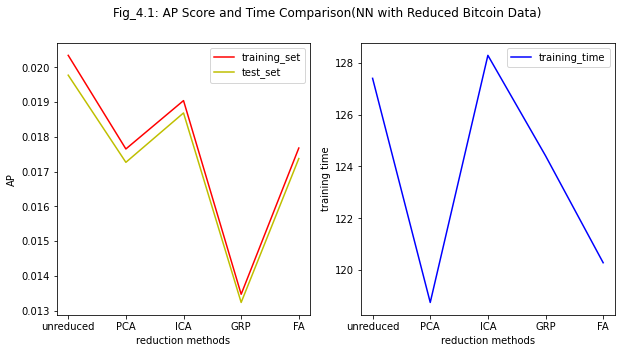

In [90]:
##NN on reduced bitcoin without label
X_Train=[X_bitcoin_train,X_bitcoin_train_pca_reduced,X_bitcoin_train_ica_reduced,X_bitcoin_train_grp_reduced,X_bitcoin_train_fa_reduced]
X_Test=[X_bitcoin_test,X_bitcoin_test_pca_reduced,X_bitcoin_test_ica_reduced,X_bitcoin_test_grp_reduced,X_bitcoin_test_fa_reduced]
t =0

average_precision_train = []
average_precision_test = []
# recall_train = []
# recall_test =[]


training_time=[]
for X_train in X_Train:
    print(t)
    MLP = MLPClassifier(hidden_layer_sizes=(5,7,7),activation ='tanh',solver='sgd',max_iter=160)
    start_time = time.time()
    MLP.fit(X_train,y_bitcoin_train)
    training_time.append(time.time()-start_time)
    y_train_predict = MLP.predict(X_train)
    y_train_predict_prob = MLP.predict_proba(X_train)[:,1]
    average_precision_train.append(average_precision_score(y_bitcoin_train,y_train_predict_prob))
#     recall_train.append(recall_score(y_bitcoin_train,y_train_predict))
    
    y_test_predict=MLP.predict(X_Test[t])
    y_test_predict_prob = MLP.predict_proba(X_Test[t])[:,1]
    average_precision_test.append(average_precision_score(y_bitcoin_test,y_test_predict_prob))
#     recall_test.append(recall_score(y_bitcoin_test,y_test_predict))
    t += 1
fig_1, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
X_Train_names=['unreduced','PCA','ICA','GRP','FA']
axs[0].plot(X_Train_names,average_precision_train,color="r",label="training_set")
axs[0].plot(X_Train_names,average_precision_test,color="y",label="test_set")
# axs[1].plot(X_Train_names,recall_train,color="b",label="training_set")
# axs[1].plot(X_Train_names,recall_test,color="g",label="test_set")
axs[1].plot(X_Train_names,training_time,color="b",label="training_time")

axs[0].set_xlabel("reduction methods")
axs[0].set_ylabel("AP")
# axs[1].set_xlabel("reduction methods")
# axs[1].set_ylabel("Recall")
axs[1].set_xlabel("reduction methods")
axs[1].set_ylabel("training time")
axs[0].legend()

axs[1].legend()
fig_1.suptitle("Fig_4.1: AP Score and Time Comparison(NN with Reduced Bitcoin Data)")
fig_1.savefig("Fig_4.1:AP Score and Time Comparison(NN with Reduced Bitcoin Data).png")



0
1
2
3
4


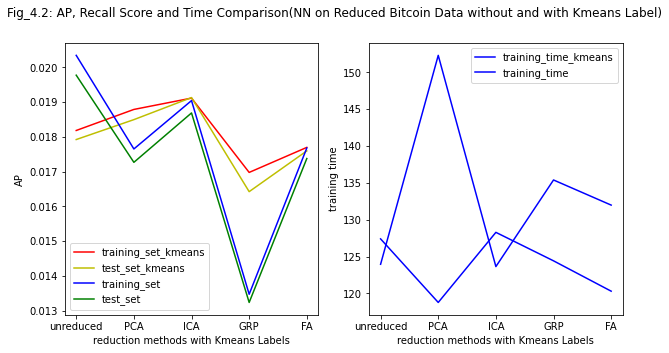

In [91]:
##NN on reduced bitcoin with kmeans label
X_Train=[X_bitcoin_train,X_bitcoin_train_kmeans_clustered_reduced_pca,X_bitcoin_train_kmeans_clustered_reduced_ica,X_bitcoin_train_kmeans_clustered_reduced_grp,X_bitcoin_train_kmeans_clustered_reduced_fa]
X_Test=[X_bitcoin_test,X_bitcoin_test_kmeans_clustered_reduced_pca,X_bitcoin_test_kmeans_clustered_reduced_ica,X_bitcoin_test_kmeans_clustered_reduced_grp,X_bitcoin_test_kmeans_clustered_reduced_fa]
t =0

average_precision_train_kmeans = []
average_precision_test_kmeans = []
# recall_train_kmeans = []
# recall_test_kmeans =[]
training_time_kmeans=[]
for X_train in X_Train:
    print(t)
    MLP = MLPClassifier(hidden_layer_sizes=(5,7,7),activation ='tanh',solver='sgd',max_iter=160)
    start_time = time.time()
    MLP.fit(X_train,y_bitcoin_train)
    training_time_kmeans.append(time.time()-start_time)
    y_train_predict = MLP.predict(X_train)
    y_train_predict_prob = MLP.predict_proba(X_train)[:,1]
    average_precision_train_kmeans.append(average_precision_score(y_bitcoin_train,y_train_predict_prob))
#     recall_train_kmeans.append(recall_score(y_bitcoin_train,y_train_predict))
    
    y_test_predict=MLP.predict(X_Test[t])
    y_test_predict_prob = MLP.predict_proba(X_Test[t])[:,1]
    average_precision_test_kmeans.append(average_precision_score(y_bitcoin_test,y_test_predict_prob))
#     recall_test_kmeans.append(recall_score(y_bitcoin_test,y_test_predict))
    t += 1
fig_1, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
X_Train_names=['unreduced','PCA','ICA','GRP','FA']
axs[0].plot(X_Train_names,average_precision_train_kmeans,color="b",label="training_set_kmeans")
axs[0].plot(X_Train_names,average_precision_test_kmeans,color="g",label="test_set_kmeans")
axs[0].plot(X_Train_names,average_precision_train,color="r",label="training_set")
axs[0].plot(X_Train_names,average_precision_test,color="y",label="test_set")
# axs[1].plot(X_Train_names,recall_train_kmeans,color="b",label="training_set")
# axs[1].plot(X_Train_names,recall_test_kmeans,color="g",label="test_set")
axs[1].plot(X_Train_names,training_time_kmeans,color="r",label="training_time_kmeans")
axs[1].plot(X_Train_names,training_time,color="b",label="training_time")

axs[0].set_xlabel("reduction methods with Kmeans Labels")
axs[0].set_ylabel("AP")
# axs[1].set_xlabel("reduction methods with Kmeans Labels")
# axs[1].set_ylabel("Recall")
axs[1].set_xlabel("reduction methods with Kmeans Labels")
axs[1].set_ylabel("training time")
axs[0].legend()

axs[1].legend()
fig_1.suptitle("Fig_4.2: AP, Recall Score and Time Comparison(NN on Reduced Bitcoin Data without and with Kmeans Label)")
fig_1.savefig("Fig_4.2: AP, Recall Score and Time Comparison(NN on Reduced Bitcoin Data without and with Kmeans Label).png")



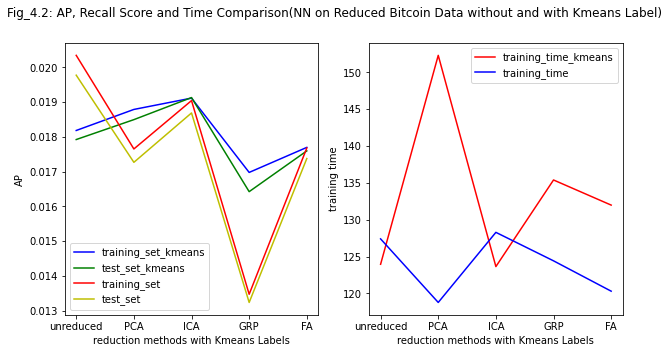

In [92]:
fig_1, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
X_Train_names=['unreduced','PCA','ICA','GRP','FA']
axs[0].plot(X_Train_names,average_precision_train_kmeans,color="b",label="training_set_kmeans")
axs[0].plot(X_Train_names,average_precision_test_kmeans,color="g",label="test_set_kmeans")
axs[0].plot(X_Train_names,average_precision_train,color="r",label="training_set")
axs[0].plot(X_Train_names,average_precision_test,color="y",label="test_set")
# axs[1].plot(X_Train_names,recall_train_kmeans,color="b",label="training_set")
# axs[1].plot(X_Train_names,recall_test_kmeans,color="g",label="test_set")
axs[1].plot(X_Train_names,training_time_kmeans,color="r",label="training_time_kmeans")
axs[1].plot(X_Train_names,training_time,color="b",label="training_time")

axs[0].set_xlabel("reduction methods with Kmeans Labels")
axs[0].set_ylabel("AP")
# axs[1].set_xlabel("reduction methods with Kmeans Labels")
# axs[1].set_ylabel("Recall")
axs[1].set_xlabel("reduction methods with Kmeans Labels")
axs[1].set_ylabel("training time")
axs[0].legend()

axs[1].legend()
fig_1.suptitle("Fig_4.2: AP, Recall Score and Time Comparison(NN on Reduced Bitcoin Data without and with Kmeans Label)")
fig_1.savefig("Fig_4.2: AP, Recall Score and Time Comparison(NN on Reduced Bitcoin Data without and with Kmeans Label).png")



0
1
2
3
4


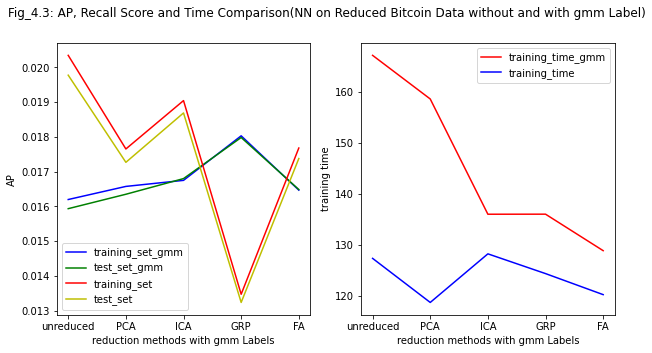

In [94]:
##NN on reduced bitcoin with EM label
X_Train=[X_bitcoin_train,X_bitcoin_train_gmm_clustered_reduced_pca,X_bitcoin_train_gmm_clustered_reduced_ica,X_bitcoin_train_gmm_clustered_reduced_grp,X_bitcoin_train_gmm_clustered_reduced_fa]
X_Test=[X_bitcoin_test,X_bitcoin_test_gmm_clustered_reduced_pca,X_bitcoin_test_gmm_clustered_reduced_ica,X_bitcoin_test_gmm_clustered_reduced_grp,X_bitcoin_test_gmm_clustered_reduced_fa]
t =0

average_precision_train_gmm = []
average_precision_test_gmm = []
# recall_train_gmm = []
# recall_test_gmm =[]
training_time_gmm=[]
for X_train in X_Train:
    print(t)
    MLP = MLPClassifier(hidden_layer_sizes=(5,7,7),activation ='tanh',solver='sgd',max_iter=160)
    start_time = time.time()
    MLP.fit(X_train,y_bitcoin_train)
    training_time_gmm.append(time.time()-start_time)
    y_train_predict = MLP.predict(X_train)
    y_train_predict_prob = MLP.predict_proba(X_train)[:,1]
    average_precision_train_gmm.append(average_precision_score(y_bitcoin_train,y_train_predict_prob))
#     recall_train_gmm.append(recall_score(y_bitcoin_train,y_train_predict))
    
    y_test_predict=MLP.predict(X_Test[t])
    y_test_predict_prob = MLP.predict_proba(X_Test[t])[:,1]
    average_precision_test_gmm.append(average_precision_score(y_bitcoin_test,y_test_predict_prob))
#     recall_test_gmm.append(recall_score(y_bitcoin_test,y_test_predict))
    t += 1
fig_1, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
X_Train_names=['unreduced','PCA','ICA','GRP','FA']
axs[0].plot(X_Train_names,average_precision_train_gmm,color="b",label="training_set_gmm")
axs[0].plot(X_Train_names,average_precision_test_gmm,color="g",label="test_set_gmm")
axs[0].plot(X_Train_names,average_precision_train,color="r",label="training_set")
axs[0].plot(X_Train_names,average_precision_test,color="y",label="test_set")

# axs[1].plot(X_Train_names,recall_train_gmm,color="b",label="training_set")
# axs[1].plot(X_Train_names,recall_test_gmm,color="g",label="test_set")
axs[1].plot(X_Train_names,training_time_gmm,color="r",label="training_time_gmm")
axs[1].plot(X_Train_names,training_time,color="b",label="training_time")


axs[0].set_xlabel("reduction methods with gmm Labels")
axs[0].set_ylabel("AP")
# axs[1].set_xlabel("reduction methods with gmm Labels")
# axs[1].set_ylabel("Recall")
axs[1].set_xlabel("reduction methods with gmm Labels")
axs[1].set_ylabel("training time")
axs[0].legend()

axs[1].legend()
fig_1.suptitle("Fig_4.3: AP, Recall Score and Time Comparison(NN on Reduced Bitcoin Data without and with gmm Label)")
fig_1.savefig("Fig_4.3: AP, Recall Score and Time Comparison(NN on Reduced Bitcoin Data without and with gmm Label).png")


In [ ]:
##NN on reduced skin without cluster label
X_Train=[X_skin_train,X_skin_train_pca_reduced,X_skin_train_ica_reduced,X_skin_train_grp_reduced,X_skin_train_fa_reduced]
X_Test=[X_skin_test,X_skin_test_pca_reduced,X_skin_test_ica_reduced,X_skin_test_grp_reduced,X_skin_test_fa_reduced]
AUC_train = []
AUC_test =[]
accuracy_train=[]
accuracy_test=[]
t=0
train_time=[]
for X_train in X_Train:
    print(t)
    MLP = MLPClassifier(hidden_layer_sizes=(5,7,6),activation ='tanh',solver='sgd',max_iter=50)
    start_time=time.time()
    MLP.fit(X_train,y_skin_train)
    train_time.append(time.time()-start_time)
    
    y_train_predict = MLP.predict(X_train)
    y_train_predict_prob = MLP.predict_proba(X_train)[:,1]
    AUC_train.append(roc_auc_score(y_skin_train,y_train_predict_prob))
    accuracy_train.append(accuracy_score(y_skin_train,y_train_predict))
    
    y_test_predict=MLP.predict(X_Test[t])
    y_test_predict_prob = MLP.predict_proba(X_Test[t])[:,1]
    AUC_test.append(roc_auc_score(y_skin_test,y_test_predict_prob))
    accuracy_test.append(accuracy_score(y_skin_test,y_test_predict))
   
    t += 1

fig_1, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
X_Train_names=['unreduced','PCA','ICA','RCP','FA']
axs[0].plot(X_Train_names,accuracy_train,"r^",linestyle='solid',label="training_set")
axs[0].plot(X_Train_names,accuracy_test,"y^",linestyle='solid',label="test_set")
axs[1].plot(X_Train_names,AUC_train,"r^",linestyle='solid',label="training_set")
axs[1].plot(X_Train_names,AUC_test,"y^",linestyle='solid',label="test_set")
axs[2].plot(X_Train_names,train_time,"b^",linestyle='solid',label="training_time")
axs[0].set_xlabel("Reduction Algorithms")
axs[0].set_ylabel("Accuracy")
axs[1].set_xlabel("Reduction Algorithms")
axs[1].set_ylabel("AUC")
axs[2].set_xlabel("Reduction Algorithm")
axs[2].set_ylabel("Training time")
axs[0].legend()
axs[1].legend()
axs[2].legend()

fig_1.suptitle("Fig_4.1: Accuracy,AUC and Time Comparison(NN on Reduced Skin Data)")
fig_1.savefig("Fig_4.1: Accuracy,AUC and Time Comparison(NN on Reduced Skin Data).png")


0
1
2


/Users/we/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


3


/Users/we/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


4


IndexError: index 2 is out of bounds for axis 0 with size 2

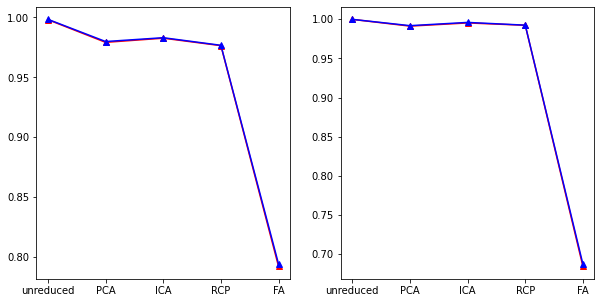

In [88]:
##NN on reduced skin with K_means label

X_Train=[X_skin_train,X_skin_train_kmeans_clustered_reduced_pca,X_skin_train_kmeans_clustered_reduced_ica,X_skin_train_kmeans_clustered_reduced_grp,X_skin_train_kmeans_clustered_reduced_fa]
X_Test=[X_skin_test,X_skin_test_kmeans_clustered_reduced_pca,X_skin_test_kmeans_clustered_reduced_ica,X_skin_test_kmeans_clustered_reduced_grp,X_skin_test_kmeans_clustered_reduced_fa]
AUC_train_kmeans = []
AUC_test_kmeans =[]
accuracy_train_kmeans=[]
accuracy_test_kmeans=[]
t=0
train_time_kmeans=[]
for X_train in X_Train:
    print(t)
    MLP = MLPClassifier(hidden_layer_sizes=(5,7,6),activation ='tanh',solver='sgd',max_iter=50)
    start_time=time.time()
    MLP.fit(X_train,y_skin_train)
    train_time_kmeans.append(time.time()-start_time)
    
    y_train_predict = MLP.predict(X_train)
    y_train_predict_prob = MLP.predict_proba(X_train)[:,1]
    AUC_train_kmeans.append(roc_auc_score(y_skin_train,y_train_predict_prob))
    accuracy_train_kmeans.append(accuracy_score(y_skin_train,y_train_predict))
    
    y_test_predict=MLP.predict(X_Test[t])
    y_test_predict_prob = MLP.predict_proba(X_Test[t])[:,1]
    AUC_test_kmeans.append(roc_auc_score(y_skin_test,y_test_predict_prob))
    accuracy_test_kmeans.append(accuracy_score(y_skin_test,y_test_predict))
   
    t += 1

fig_2, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
X_Train_names=['unreduced','PCA','ICA','RCP','FA']
axs[0].plot(X_Train_names,accuracy_train_kmeans,"b^",linestyle='solid',label="training_set_kmeans")
axs[0].plot(X_Train_names,accuracy_test_kmeans,"g^",linestyle='solid',label="test_set_kmeans")
axs[0].plot(X_Train_names,accuracy_train,"r^",linestyle='solid',label="training_set_kmeans")
axs[0].plot(X_Train_names,accuracy_test,"y^",linestyle='solid',label="test_set_kmeans")
axs[1].plot(X_Train_names,AUC_train_kmeans,"b^",linestyle='solid',label="training_set_kemans")
axs[1].plot(X_Train_names,AUC_test_kmeans,"g^",linestyle='solid',label="test_set_kmeans")
axs[1].plot(X_Train_names,AUC_train_kmeans,"r^",linestyle='solid',label="training_set")
axs[1].plot(X_Train_names,AUC_test_kmeans,"y^",linestyle='solid',label="test_set")
axs[2].plot(X_Train_names,train_time_kmeans,"r^",linestyle='solid',label="training_time_kmeans")
axs[2].plot(X_Train_names,train_time,"b^",linestyle='solid',label="training_time")
axs[0].set_xlabel("Reduction Algorithms with Kmeans Labels")
axs[0].set_ylabel("Accuracy")
axs[1].set_xlabel("Reduction Algorithms with Kmeans Label")
axs[1].set_ylabel("AUC")
axs[2].set_xlabel("Reduction Algorithm with Kmeans Label")
axs[2].set_ylabel("Training time")
axs[0].legend()
axs[1].legend()
axs[2].legend()

fig_2.suptitle("Fig_4.2: Accuracy,AUC and Time Comparison(NN on Reduced Skin Data without and with Kmeans Label)")
fig_2.savefig("Fig_4.2: Accuracy,AUC and Time Comparison(NN with Reduced Skin Data without and with Kmeans Label).png")


0
1
2


/Users/we/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


3


/Users/we/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


4


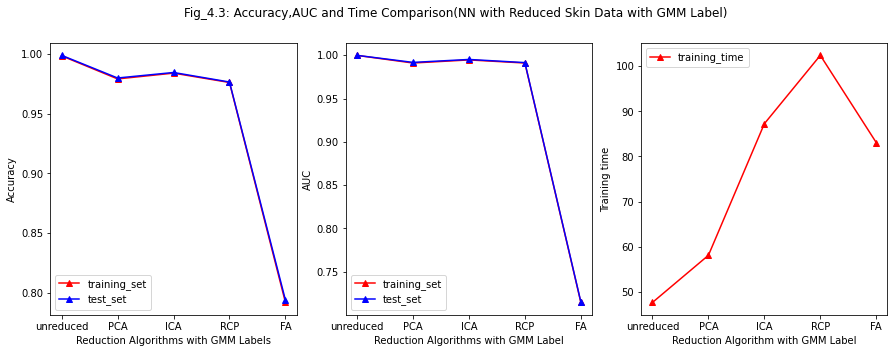

In [62]:
####NN on reduced skin with EM cluster label

X_Train=[X_skin_train,X_skin_train_gmm_clustered_reduced_pca,X_skin_train_gmm_clustered_reduced_ica,X_skin_train_gmm_clustered_reduced_grp,X_skin_train_gmm_clustered_reduced_fa]
X_Test=[X_skin_test,X_skin_test_gmm_clustered_reduced_pca,X_skin_test_gmm_clustered_reduced_ica,X_skin_test_gmm_clustered_reduced_grp,X_skin_test_gmm_clustered_reduced_fa]
AUC_train_gmm = []
AUC_test_gmm =[]
accuracy_train_gmm=[]
accuracy_test_gmm=[]
t=0
train_time_gmm=[]
for X_train in X_Train:
    print(t)
    MLP = MLPClassifier(hidden_layer_sizes=(5,7,6),activation ='tanh',solver='sgd',max_iter=50)
    start_time=time.time()
    MLP.fit(X_train,y_skin_train)
    train_time_gmm.append(time.time()-start_time)
    
    y_train_predict = MLP.predict(X_train)
    y_train_predict_prob = MLP.predict_proba(X_train)[:,1]
    AUC_train_gmm.append(roc_auc_score(y_skin_train,y_train_predict_prob))
    accuracy_train_gmm.append(accuracy_score(y_skin_train,y_train_predict))
    
    y_test_predict=MLP.predict(X_Test[t])
    y_test_predict_prob = MLP.predict_proba(X_Test[t])[:,1]
    AUC_test_gmm.append(roc_auc_score(y_skin_test,y_test_predict_prob))
    accuracy_test_gmm.append(accuracy_score(y_skin_test,y_test_predict))
   
    t += 1

fig_2, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
X_Train_names=['unreduced','PCA','ICA','RCP','FA']
axs[0].plot(X_Train_names,accuracy_train_gmm,"b^",linestyle='solid',label="training_set_gmm")
axs[0].plot(X_Train_names,accuracy_test_gmm,"g^",linestyle='solid',label="test_set_gmm")
axs[0].plot(X_Train_names,accuracy_train,"r^",linestyle='solid',label="training_set")
axs[0].plot(X_Train_names,accuracy_test,"y^",linestyle='solid',label="test_set")
axs[1].plot(X_Train_names,AUC_train_gmm,"b^",linestyle='solid',label="training_set_gmm")
axs[1].plot(X_Train_names,AUC_test_gmm,"g^",linestyle='solid',label="test_set_gmm")
axs[1].plot(X_Train_names,AUC_train,"r^",linestyle='solid',label="training_set")
axs[1].plot(X_Train_names,AUC_test,"y^",linestyle='solid',label="test_set")
axs[2].plot(X_Train_names,train_time_gmm,"r^",linestyle='solid',label="training_time_gmm")
axs[2].plot(X_Train_names,train_time,"b^",linestyle='solid',label="training_time")
axs[0].set_xlabel("Reduction Algorithms with GMM Labels")
axs[0].set_ylabel("Accuracy")
axs[1].set_xlabel("Reduction Algorithms with GMM Label")
axs[1].set_ylabel("AUC")
axs[2].set_xlabel("Reduction Algorithm with GMM Label")
axs[2].set_ylabel("Training time")
axs[0].legend()
axs[1].legend()
axs[2].legend()

fig_2.suptitle("Fig_4.3: Accuracy,AUC and Time Comparison(NN with Reduced Skin Data without and with GMM Label)")
fig_2.savefig("Fig_4.3: Accuracy,AUC and Time Comparison(NN with Reduced Skin Data without and with GMM Label).png")
